# Muhammad Saifullah Elevvo Pathways Data Analytics Internship - 2 Weeks
# Task 4: Data Cleaning and Insight Generation from Survey Data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/bhatt/OneDrive/Desktop/RESUMES CVS/Elevvo Internship/Task 3/Survey.csv")

In [3]:
df

,Age,Gender,Organization Type:,Position/Role,Years of Experience in Banking/IT:,Our organization is currently exploring blockchain-based solutions.,Blockchain is being implemented in at least one area of our banking operations.,Top management supports blockchain adoption initiatives.,We have a dedicated team or project for blockchain integration.,Our organization is aware of the strategic benefits of blockchain.,...,Regulatory uncertainty makes it difficult to adopt blockchain.,High costs of blockchain implementation are a major barrier.,Lack of internal technical expertise slows adoption.,Our legacy systems are not compatible with blockchain technology.,Data privacy and compliance concerns hinder adoption.,Blockchain has improved transaction speed and efficiency.,Blockchain adoption has reduced operational costs.,. We have seen improved transparency in financial reporting due to blockchain.,Blockchain adoption has enhanced our competitive advantage.,Customer trust has increased with blockchain-related services.
0,under 25,Male,Commercial Bank,Cashier,Less than 2 years,1,2,2,2,1,...,3,3,3,2,3,2,2,2,2,2
1,under 25,Male,Central Bank,Manager,Less than 2 years,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,under 25,Male,Commercial Bank,Accountant,Less than 2 years,2,2,1,2,4,...,3,5,4,2,2,4,2,4,4,4
3,under 25,Male,Commercial Bank,manager,Less than 2 years,3,4,4,5,4,...,4,1,4,1,1,4,2,4,3,4
4,35 - 44,Female,NaN,As a admin,Less than 2 years,1,1,5,1,1,...,1,1,1,1,1,1,1,1,1,1
5,under 25,Female,Commercial Bank,Cashier,Less than 2 years,5,5,5,5,5,...,3,5,3,4,4,4,4,5,5,5
6,under 25,Male,Commercial Bank,Cashier,Less than 2 years,4,3,3,5,4,...,3,2,4,3,5,3,2,4,4,5
7,under 25,Female,Digital Bank,PBO,Less than 2 years,1,2,3,2,5,...,2,4,2,3,5,4,5,2,2,3
8,under 25,Male,Commercial Bank,Student,Less than 2 years,4,5,5,4,5,...,3,5,4,4,5,3,3,5,5,5
9,under 25,Female,Digital Bank,manager,Less than 2 years,4,3,3,4,4,...,3,3,3,3,3,4,4,4,4,3


In [4]:
missing_values = df.isnull().sum()
print("🔎 Missing Values:\n", missing_values, "\n")

🔎 Missing Values:
 Age                                                                                0
Gender                                                                             0
Organization Type:                                                                 2
Position/Role                                                                      2
Years of Experience in Banking/IT:                                                 0
Our organization is currently exploring blockchain-based solutions.                0
Blockchain is being implemented in at least one area of our banking operations.    0
Top management supports blockchain adoption initiatives.                           0
We have a dedicated team or project for blockchain integration.                    0
Our organization is aware of the strategic benefits of blockchain.                 0
Blockchain technology improves transaction security in our organization            0
Blockchain ensures data integrity and reduces 

In [5]:
duplicate_rows = df[df.duplicated()]
print("🔎 Duplicate Rows Count:", duplicate_rows.shape[0])
print("Sample Duplicate Rows:\n", duplicate_rows.head(), "\n")

🔎 Duplicate Rows Count: 0
Sample Duplicate Rows:
 Empty DataFrame
Columns: [Age, Gender, Organization Type:, Position/Role, Years of Experience in Banking/IT:, Our organization is currently exploring blockchain-based solutions., Blockchain is being implemented in at least one area of our banking operations., Top management supports blockchain adoption initiatives., We have a dedicated team or project for blockchain integration., Our organization is aware of the strategic benefits of blockchain., Blockchain technology improves transaction security in our organization, Blockchain ensures data integrity and reduces fraud risk., Our organization sees blockchain as a key tool to enhance cybersecurity., Security improvements due to blockchain lead to greater customer trust., Regulatory uncertainty makes it difficult to adopt blockchain., High costs of blockchain implementation are a major barrier., Lack of internal technical expertise slows adoption., Our legacy systems are not compatible wi

In [6]:
inconsistent_formatting = {}
for col in df.select_dtypes(include='object').columns:
    unique_values = df[col].dropna().unique()
    # Normalize values (strip spaces + lowercase)
    normalized_values = set([str(v).strip().lower() for v in unique_values])
    inconsistent_formatting[col] = {
        "original_unique_values": unique_values,
        "normalized_unique_values": list(normalized_values)
    }

print("🔎 Inconsistent Formatting Detected:")
for col, values in inconsistent_formatting.items():
    print(f"\nColumn: {col}")
    print("Original:", values["original_unique_values"])
    print("Normalized:", values["normalized_unique_values"])

🔎 Inconsistent Formatting Detected:

Column: Age
Original: ['under 25' '35 - 44' '24 - 34' '55 +']
Normalized: ['35 - 44', '24 - 34', '55 +', 'under 25']

Column: Gender
Original: ['Male' 'Female' 'Prefer not to say']
Normalized: ['male', 'female', 'prefer not to say']

Column: Organization Type:
Original: ['Commercial Bank' 'Central Bank' 'Digital Bank' 'Fintech Company'
 'educational' 'University']
Normalized: ['central bank', 'fintech company', 'digital bank', 'educational', 'commercial bank', 'university']

Column: Position/Role
Original: ['Cashier' 'Manager' 'Accountant' 'manager' 'As a admin' 'PBO' 'Student'
 'CEO' 'student' 'Data Scientist' 'Analyst' 'Nothing' 'marketing' 'Boss'
 'Junior assistant' 'User' 'MANAGER' 'Nill' '.' 'General Manager'
 'Employee' 'accountant' 'Director\n']
Normalized: ['employee', '.', 'manager', 'ceo', 'marketing', 'boss', 'pbo', 'general manager', 'director', 'nothing', 'accountant', 'cashier', 'as a admin', 'nill', 'junior assistant', 'user', 'analys

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df_encoded = df.copy()

In [9]:
categorical_cols = ['Age', 'Gender', 'Organization Type:', 'Position/Role', 'Years of Experience in Banking/IT:']

In [10]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [11]:
print(df_encoded[categorical_cols].head())

   Age  Gender  Organization Type:  Position/Role  \
0    3       1                   1              6   
1    3       1                   0             13   
2    3       1                   1              1   
3    3       1                   1             20   
4    1       0                   6              3   

   Years of Experience in Banking/IT:  
0                                   2  
1                                   2  
2                                   2  
3                                   2  
4                                   2  


In [12]:
for col, le in label_encoders.items():
    print(f"\nMapping for {col}:")
    for cls, code in zip(le.classes_, le.transform(le.classes_)):
        print(f"  {cls} → {code}")


Mapping for Age:
  24 - 34 → 0
  35 - 44 → 1
  55 + → 2
  under 25 → 3

Mapping for Gender:
  Female → 0
  Male → 1
  Prefer not to say → 2

Mapping for Organization Type::
  Central Bank → 0
  Commercial Bank → 1
  Digital Bank → 2
  Fintech Company → 3
  University → 4
  educational → 5
  nan → 6

Mapping for Position/Role:
  . → 0
  Accountant → 1
  Analyst → 2
  As a admin → 3
  Boss → 4
  CEO → 5
  Cashier → 6
  Data Scientist → 7
  Director
 → 8
  Employee → 9
  General Manager → 10
  Junior assistant → 11
  MANAGER → 12
  Manager → 13
  Nill → 14
  Nothing → 15
  PBO → 16
  Student → 17
  User → 18
  accountant → 19
  manager → 20
  marketing → 21
  student → 22
  nan → 23

Mapping for Years of Experience in Banking/IT::
  2–5 years → 0
  6–10 years → 1
  Less than 2 years → 2
  More than 10 years → 3


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Age
under 25    36
24 - 34      9
35 - 44      3
55 +         1
Name: count, dtype: int64
Gender
Male                 27
Female               20
Prefer not to say     2
Name: count, dtype: int64
Organization Type:
Digital Bank       20
Commercial Bank    17
Central Bank        4
Fintech Company     4
educational         1
University          1
Name: count, dtype: int64


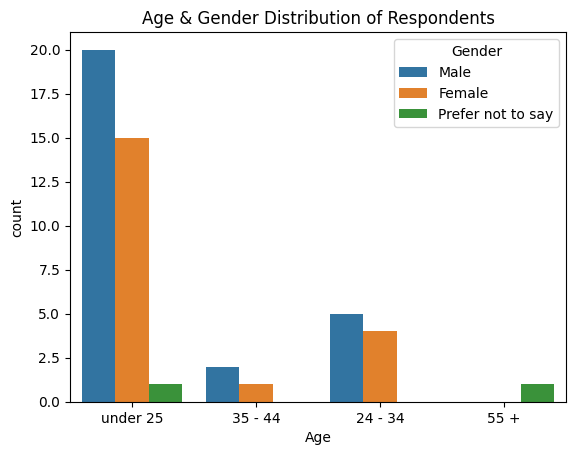

In [14]:
print(df['Age'].value_counts())
print(df['Gender'].value_counts())
print(df['Organization Type:'].value_counts())

sns.countplot(data=df, x="Age", hue="Gender")
plt.title("Age & Gender Distribution of Respondents")
plt.show()

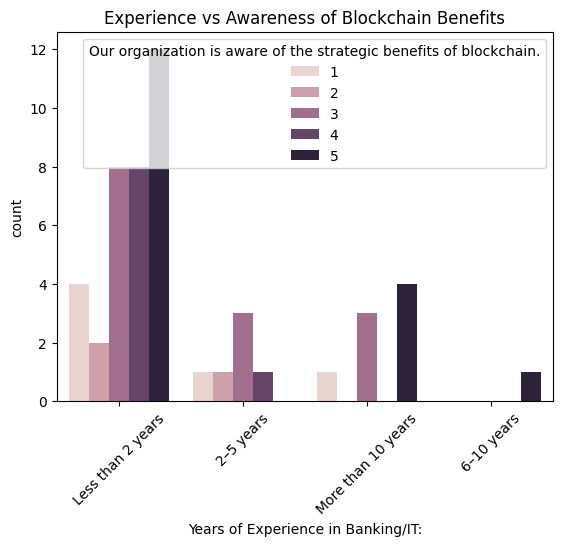

In [15]:
sns.countplot(data=df, x="Years of Experience in Banking/IT:", 
              hue="Our organization is aware of the strategic benefits of blockchain.")
plt.title("Experience vs Awareness of Blockchain Benefits")
plt.xticks(rotation=45)
plt.show()

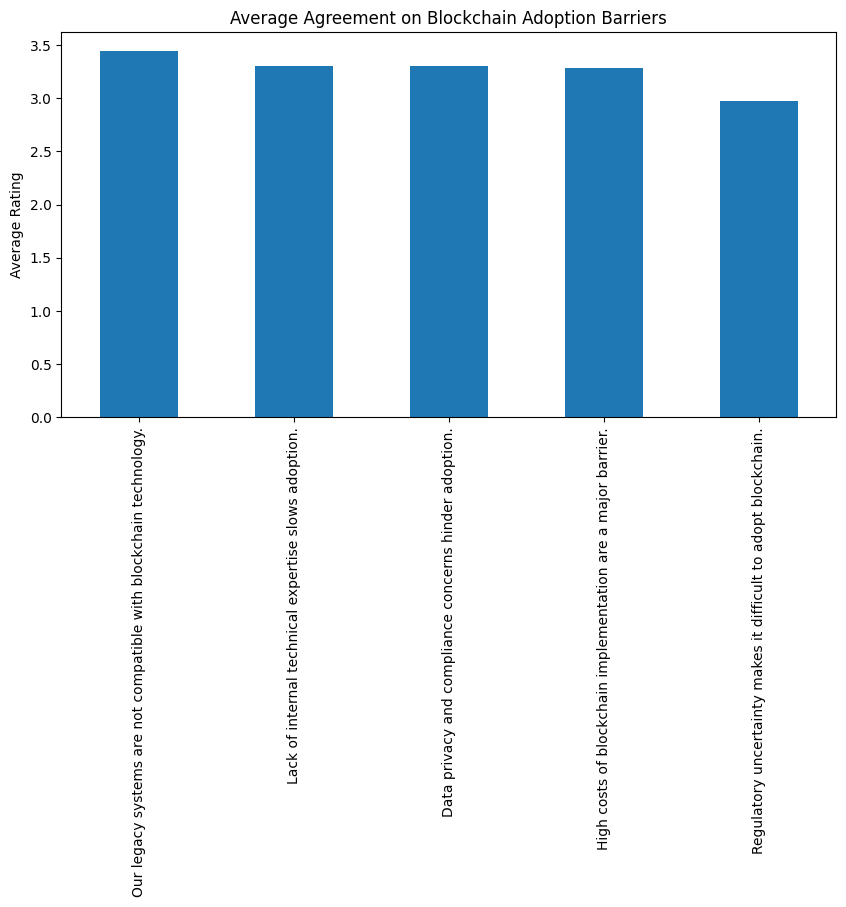

In [16]:
barriers = [
    "Regulatory uncertainty makes it difficult to adopt blockchain.",
    "High costs of blockchain implementation are a major barrier.",
    "Lack of internal technical expertise slows adoption.",
    "Our legacy systems are not compatible with blockchain technology.",
    "Data privacy and compliance concerns hinder adoption."
]

barrier_means = df[barriers].mean().sort_values(ascending=False)
barrier_means.plot(kind="bar", figsize=(10,5))
plt.title("Average Agreement on Blockchain Adoption Barriers")
plt.ylabel("Average Rating")
plt.show()

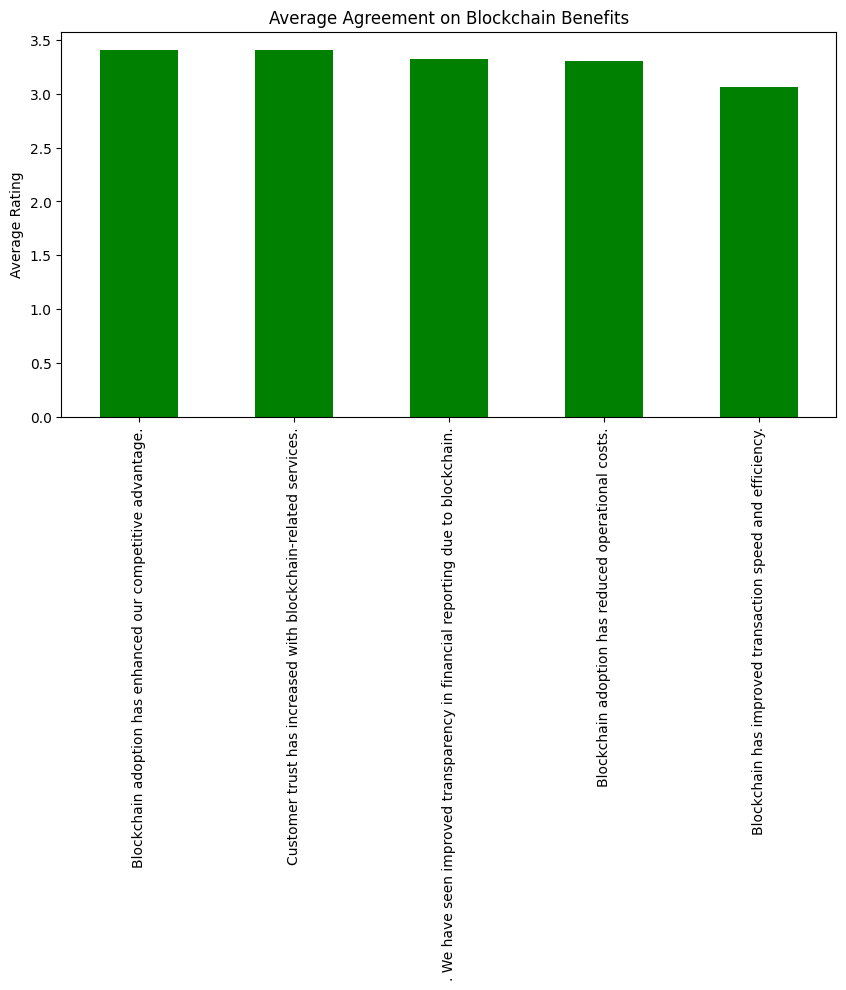

In [17]:
benefits = [
    "Blockchain has improved transaction speed and efficiency.",
    "Blockchain adoption has reduced operational costs.",
    ". We have seen improved transparency in financial reporting due to blockchain.",
    "Blockchain adoption has enhanced our competitive advantage.",
    "Customer trust has increased with blockchain-related services."
]

benefit_means = df[benefits].mean().sort_values(ascending=False)
benefit_means.plot(kind="bar", color="green", figsize=(10,5))
plt.title("Average Agreement on Blockchain Benefits")
plt.ylabel("Average Rating")
plt.show()

In [19]:
corr = df["Top management supports blockchain adoption initiatives."].corr(
    df["Blockchain is being implemented in at least one area of our banking operations."]
)
print(f"Correlation between Management Support and Blockchain Implementation: {corr:.2f}")

Correlation between Management Support and Blockchain Implementation: 0.53


In [20]:
print("Analysis Complete")

Analysis Complete
